In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import mixture
import nltk
from nltk.tokenize import word_tokenize
from uk_stemmer import UkStemmer
from string import punctuation
from typing import List
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split

In [2]:
cluster1 = np.random.randn(50, 2) * .5 + np.array([3, -2])
cluster2 = np.random.randn(30, 2) * .5 + np.array([-1, -1])

X_train = np.vstack([cluster1, cluster2])
X_test = np.vstack([np.random.randn(20, 2) * .5 + np.array([3, -2]), np.random.randn(10, 2) * .5 + np.array([-1, -1])])

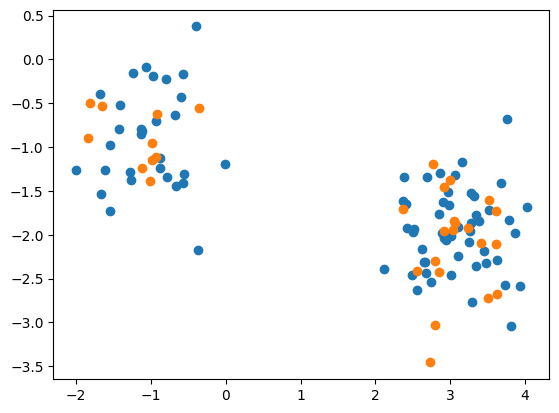

In [3]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_test[:,0], X_test[:,1])

plt.show()

In [4]:
mixture_model = mixture.GaussianMixture(2)

mixture_model.fit(X_train)

GaussianMixture(n_components=2)

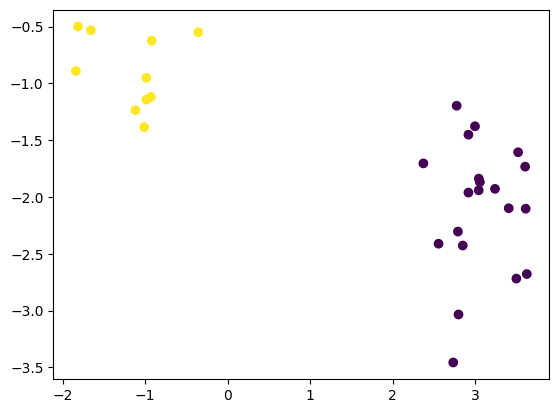

In [5]:
plt.scatter(X_test[:,0], X_test[:,1], c=mixture_model.predict(X_test))

plt.show()

# Test text coding

In [3]:
df = pd.read_csv('./data/data_set_4.csv.zip')

df

,Unnamed: 0,Link,Text,Label
0,0,https://t.me/c/1376264484/328,"Просто слухайте цей діалог. Ні, це не нарізка ...",True
1,1,https://t.me/c/1376264484/338,️ Рубль став найнестабільнішою валютою у всьом...,True
2,2,https://t.me/c/1376264484/350,Перше звернення мера Мелітополя Івана Федорова...,True
3,3,https://t.me/c/1376264484/361,"Росія загрожує Боснії ""українським сценарієм"" ...",True
4,4,https://t.me/c/1376264484/366,"Енергоатом повідомив, що окупанти пошкодили ви...",True
...,...,...,...,...
10730,2241,https://t.me/warfakes/8878,"Громадян Таджикистану, який убив 11 людей на п...",False
10731,2242,https://t.me/warfakes/8903,: Російська туристична компанія помилково відп...,False
10732,2243,https://t.me/warfakes/8907,Відеозвернення губернатора Херсонської області...,False
10733,2244,https://t.me/warfakes/8909,"Росіяни на Новий рік залишаться без текіли, бу...",False


In [4]:
word_tokenize(df.loc[0]['Text'].lower())

['просто',
 'слухайте',
 'цей',
 'діалог',
 '.',
 'ні',
 ',',
 'це',
 'не',
 'нарізка',
 'і',
 'фільм',
 'тарантіно',
 '.']

In [5]:
stemmer = UkStemmer()

incorrect_stopwords = ['рос']
with open('./data/stopwords_ua.txt') as f_stopwords:
    stopwords = [x.replace('\n', '') for x in f_stopwords.readlines()]
    stopwords = [sw for sw in stopwords if sw not in incorrect_stopwords]

num_re = re.compile(r'\d+')

words_re = re.compile(r'\w+')

def prepare_uk(text: str) -> List[str]:
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem_word(t) for t in tokens]
    tokens = [t for t in tokens if t not in punctuation]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if num_re.match(t) is None]
    tokens = [t for t in tokens if words_re.match(t) is not None]

    return ' '.join(tokens)

In [42]:
prepare_uk('Росія загрожує Боснії "українським сценарієм"')

'рос загрож босні українськ сценарі'

In [6]:
df['text_preprocessed'] = df['Text'].apply(prepare_uk)

df

,Unnamed: 0,Link,Text,Label,text_preprocessed
0,0,https://t.me/c/1376264484/328,"Просто слухайте цей діалог. Ні, це не нарізка ...",True,прост слухайт діалог нарізк фільм тарантін
1,1,https://t.me/c/1376264484/338,️ Рубль став найнестабільнішою валютою у всьом...,True,рубл найнестабільніш валют всьом світ
2,2,https://t.me/c/1376264484/350,Перше звернення мера Мелітополя Івана Федорова...,True,перш зверненн мер мелітопол іван федор післ зв...
3,3,https://t.me/c/1376264484/361,"Росія загрожує Боснії ""українським сценарієм"" ...",True,рос загрож босні українськ сценарі можлив всту...
4,4,https://t.me/c/1376264484/366,"Енергоатом повідомив, що окупанти пошкодили ви...",True,енергоат повідом окупант пошкодил високовольтн...
...,...,...,...,...,...
10730,2241,https://t.me/warfakes/8878,"Громадян Таджикистану, який убив 11 людей на п...",False,громадян таджикистан уб люд полігон білгород п...
10731,2242,https://t.me/warfakes/8903,: Російська туристична компанія помилково відп...,False,російськ туристичн компан помилков відправля б...
10732,2243,https://t.me/warfakes/8907,Відеозвернення губернатора Херсонської області...,False,відеозверненн губернатор херсонськ област воло...
10733,2244,https://t.me/warfakes/8909,"Росіяни на Новий рік залишаться без текіли, бу...",False,росіян нов залиш текіл бурбон коньяк французьк...


In [27]:
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, min_df=.001)

vectorized = vectorizer.fit_transform(df['text_preprocessed']).toarray()

vectorizer.get_feature_names_out().shape

(1744,)

In [28]:
true_fake_model = mixture.GaussianMixture(2)

true_fake_model.fit(vectorized)

GaussianMixture(n_components=2)

In [31]:
df['predicted_gmm'] = true_fake_model.predict(vectorized)

In [32]:
df

,Unnamed: 0,Link,Text,Label,text_preprocessed,predicted_gmm
0,0,https://t.me/c/1376264484/328,"Просто слухайте цей діалог. Ні, це не нарізка ...",True,прост слухайт діалог нарізк фільм тарантін,1
1,1,https://t.me/c/1376264484/338,️ Рубль став найнестабільнішою валютою у всьом...,True,рубл найнестабільніш валют всьом світ,0
2,2,https://t.me/c/1376264484/350,Перше звернення мера Мелітополя Івана Федорова...,True,перш зверненн мер мелітопол іван федор післ зв...,0
3,3,https://t.me/c/1376264484/361,"Росія загрожує Боснії ""українським сценарієм"" ...",True,рос загрож босні українськ сценарі можлив всту...,1
4,4,https://t.me/c/1376264484/366,"Енергоатом повідомив, що окупанти пошкодили ви...",True,енергоат повідом окупант пошкодил високовольтн...,0
...,...,...,...,...,...,...
10730,2241,https://t.me/warfakes/8878,"Громадян Таджикистану, який убив 11 людей на п...",False,громадян таджикистан уб люд полігон білгород п...,0
10731,2242,https://t.me/warfakes/8903,: Російська туристична компанія помилково відп...,False,російськ туристичн компан помилков відправля б...,0
10732,2243,https://t.me/warfakes/8907,Відеозвернення губернатора Херсонської області...,False,відеозверненн губернатор херсонськ област воло...,0
10733,2244,https://t.me/warfakes/8909,"Росіяни на Новий рік залишаться без текіли, бу...",False,росіян нов залиш текіл бурбон коньяк французьк...,0


In [33]:
df = df.drop(columns=['Unnamed: 0'])

df

,Link,Text,Label,text_preprocessed,predicted_gmm
0,https://t.me/c/1376264484/328,"Просто слухайте цей діалог. Ні, це не нарізка ...",True,прост слухайт діалог нарізк фільм тарантін,1
1,https://t.me/c/1376264484/338,️ Рубль став найнестабільнішою валютою у всьом...,True,рубл найнестабільніш валют всьом світ,0
2,https://t.me/c/1376264484/350,Перше звернення мера Мелітополя Івана Федорова...,True,перш зверненн мер мелітопол іван федор післ зв...,0
3,https://t.me/c/1376264484/361,"Росія загрожує Боснії ""українським сценарієм"" ...",True,рос загрож босні українськ сценарі можлив всту...,1
4,https://t.me/c/1376264484/366,"Енергоатом повідомив, що окупанти пошкодили ви...",True,енергоат повідом окупант пошкодил високовольтн...,0
...,...,...,...,...,...
10730,https://t.me/warfakes/8878,"Громадян Таджикистану, який убив 11 людей на п...",False,громадян таджикистан уб люд полігон білгород п...,0
10731,https://t.me/warfakes/8903,: Російська туристична компанія помилково відп...,False,російськ туристичн компан помилков відправля б...,0
10732,https://t.me/warfakes/8907,Відеозвернення губернатора Херсонської області...,False,відеозверненн губернатор херсонськ област воло...,0
10733,https://t.me/warfakes/8909,"Росіяни на Новий рік залишаться без текіли, бу...",False,росіян нов залиш текіл бурбон коньяк французьк...,0


In [36]:
df['predicted_gmm'] = df['predicted_gmm'].astype(bool)

df

,Link,Text,Label,text_preprocessed,predicted_gmm
0,https://t.me/c/1376264484/328,"Просто слухайте цей діалог. Ні, це не нарізка ...",True,прост слухайт діалог нарізк фільм тарантін,True
1,https://t.me/c/1376264484/338,️ Рубль став найнестабільнішою валютою у всьом...,True,рубл найнестабільніш валют всьом світ,False
2,https://t.me/c/1376264484/350,Перше звернення мера Мелітополя Івана Федорова...,True,перш зверненн мер мелітопол іван федор післ зв...,False
3,https://t.me/c/1376264484/361,"Росія загрожує Боснії ""українським сценарієм"" ...",True,рос загрож босні українськ сценарі можлив всту...,True
4,https://t.me/c/1376264484/366,"Енергоатом повідомив, що окупанти пошкодили ви...",True,енергоат повідом окупант пошкодил високовольтн...,False
...,...,...,...,...,...
10730,https://t.me/warfakes/8878,"Громадян Таджикистану, який убив 11 людей на п...",False,громадян таджикистан уб люд полігон білгород п...,False
10731,https://t.me/warfakes/8903,: Російська туристична компанія помилково відп...,False,російськ туристичн компан помилков відправля б...,False
10732,https://t.me/warfakes/8907,Відеозвернення губернатора Херсонської області...,False,відеозверненн губернатор херсонськ област воло...,False
10733,https://t.me/warfakes/8909,"Росіяни на Новий рік залишаться без текіли, бу...",False,росіян нов залиш текіл бурбон коньяк французьк...,False


In [37]:
df[df['Label'] == df['predicted_gmm']]

,Link,Text,Label,text_preprocessed,predicted_gmm
0,https://t.me/c/1376264484/328,"Просто слухайте цей діалог. Ні, це не нарізка ...",True,прост слухайт діалог нарізк фільм тарантін,True
3,https://t.me/c/1376264484/361,"Росія загрожує Боснії ""українським сценарієм"" ...",True,рос загрож босні українськ сценарі можлив всту...,True
5,https://t.me/c/1376264484/376,Макрон закликає готуватися до великої війни у ...,True,макрон заклик готув велик війн,True
6,https://t.me/c/1376264484/386,"Байден має намір заявити Сі Цзіньпіну, що США ...",True,байден ма намір заявит цзіньпін сша вживут зах...,True
7,https://t.me/c/1376264484/391,Урядові літаки РФ здійснили незвичайні рейси з...,True,уряд літак рф здійснил незвичайн москв сибір,True
...,...,...,...,...,...
10729,https://t.me/warfakes/8875,Замкомандувача Другого армійського корпусу Нар...,False,замкомандувач друг армійськ корпус народн мілі...,False
10730,https://t.me/warfakes/8878,"Громадян Таджикистану, який убив 11 людей на п...",False,громадян таджикистан уб люд полігон білгород п...,False
10731,https://t.me/warfakes/8903,: Російська туристична компанія помилково відп...,False,російськ туристичн компан помилков відправля б...,False
10732,https://t.me/warfakes/8907,Відеозвернення губернатора Херсонської області...,False,відеозверненн губернатор херсонськ област воло...,False


In [38]:
df.to_csv('./data/out_uk.csv')